<a href="https://colab.research.google.com/github/guilhermevicente11/analise-dados-churn/blob/main/c%C3%B3digos_do_relat%C3%B3rio.py" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Este notebook apresenta todos os códigos dos gráficos que foram apresentados no relatório.

##Primeiras impressões

Importação das bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

Leitura do csv e primeira impresão das 5 primeiras linhas

In [ ]:
df = pd.read_csv('/content/churn.csv', sep=',')
df.head(5)

Olhar os tipos de coluna e identificar se há valores nulos.

In [ ]:
df.info()

In [ ]:
df.isna()

Filtrando o dataset para quem saiu

In [5]:
saida_pessoal = df.loc[df.Exited == 1]

Primeiras impressões de quem saiu

In [ ]:
saida_pessoal.describe()

#1.Iniciando a análise exploratória 

Gráfico de pizza do percentual de clientes

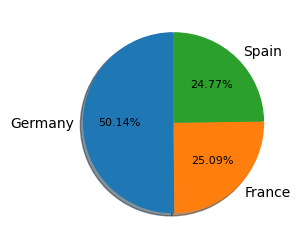

In [96]:
values = df.Geography.value_counts()
labels = ['Germany','France','Spain']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90)

plt.setp(texts, color = 'black')
plt.setp(autotexts, size = 8, color = 'black')
autotexts[1].set_color('black')
plt.show()

Gráfico de pizza de gênero

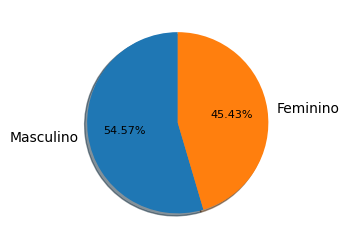

In [9]:
values = df.Gender.value_counts()
labels = ['Masculino','Feminino']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90)

plt.setp(texts, color = 'black')
plt.setp(autotexts, size = 8, color = 'black')
autotexts[1].set_color('black')
plt.show()

Gráfico de pizza quem saiu e não saiu

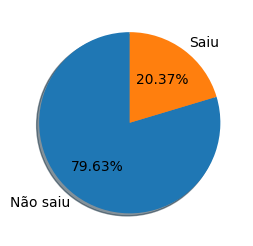

In [144]:
values = df.Exited.value_counts()
labels = ['Não saiu', 'Saiu']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)


patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90)

plt.show()

Visualização geral das categorias

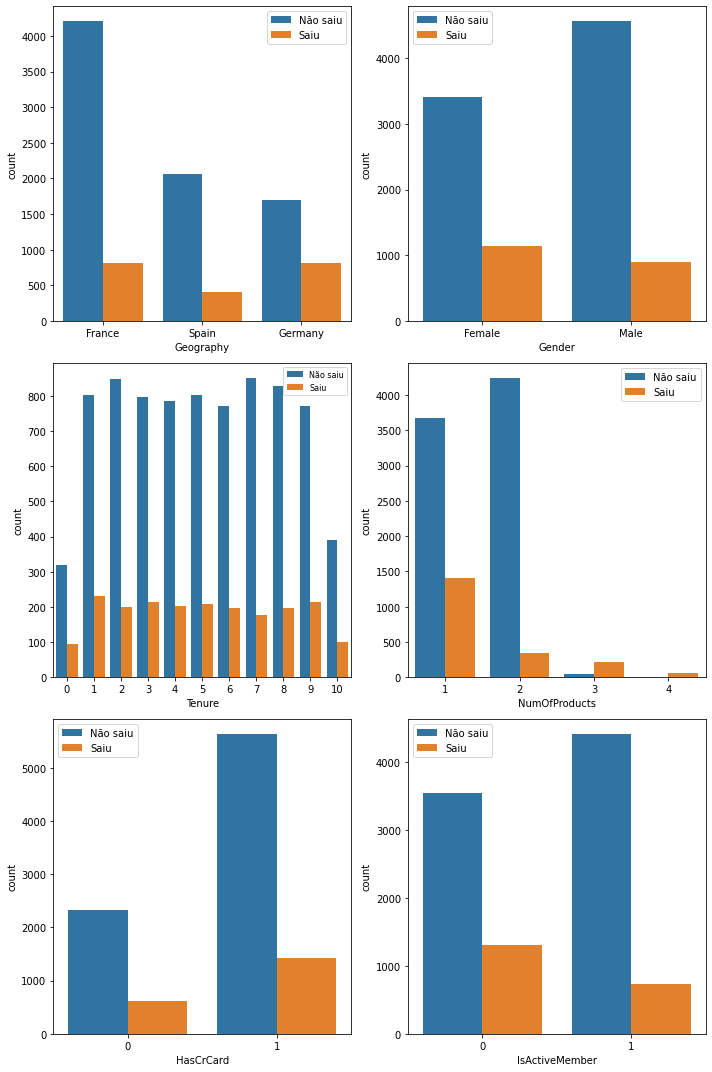

In [118]:
fig, ax = plt.subplots(3, 2, figsize = (10, 15))

sns.countplot(x = 'Geography', hue = 'Exited', data = df, ax = ax[0][0]).legend(['Não saiu', 'Saiu'],fontsize=10)
sns.countplot(x = 'Gender', hue = 'Exited', data = df, ax = ax[0][1]).legend(['Não saiu', 'Saiu'],fontsize=10)
sns.countplot(x = 'Tenure', hue = 'Exited', data = df, ax = ax[1][0]).legend(['Não saiu', 'Saiu'],fontsize=8)
sns.countplot(x = 'NumOfProducts', hue = 'Exited', data = df, ax = ax[1][1]).legend(['Não saiu', 'Saiu'],fontsize=10)
sns.countplot(x = 'HasCrCard', hue = 'Exited', data = df, ax = ax[2][0]).legend(['Não saiu', 'Saiu'],fontsize=10)
sns.countplot(x = 'IsActiveMember', hue = 'Exited', data = df, ax = ax[2][1]).legend(['Não saiu', 'Saiu'],fontsize=10)




plt.tight_layout()
plt.show()

#2. Aprofundando a análise exploratória

##2.1 IDADE

Observando a frequencia por idade

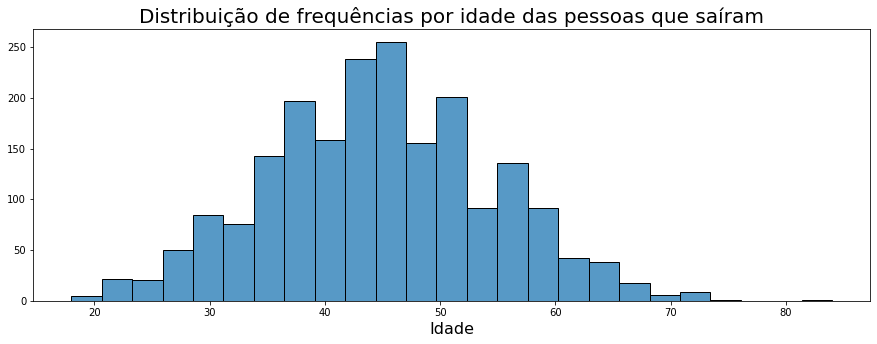

In [13]:
hist_age = sns.histplot(saida_pessoal['Age'], kde= False, bins = 25 )
hist_age.figure.set_size_inches(15, 5)
hist_age.set_title('Distribuição de frequências por idade das pessoas que saíram', fontsize=20)
hist_age.set_xlabel('Idade', fontsize=16)
hist_age.set_ylabel('')
hist_age
plt.show()

Idade entre 40 e 60

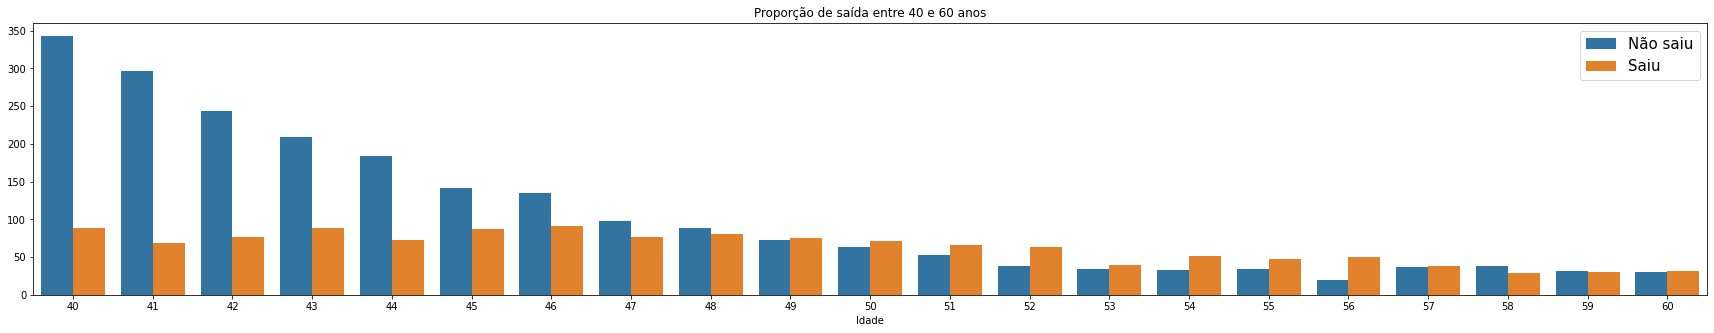

In [125]:
#40-60
saida4060 = df.query('40 <= Age <= 60')
saida4060.value_counts()
graf4060 = sns.countplot(x='Age', hue='Exited', data = saida4060)
graf4060.figure.set_size_inches(30,5)
graf4060.set(title = 'Proporção de saída entre 40 e 60 anos')
graf4060.set_xlabel("Idade")
graf4060.set_ylabel("")
plt.legend(['Não saiu', 'Saiu'],fontsize=15)
plt.show()

Idade entre 18 e 39

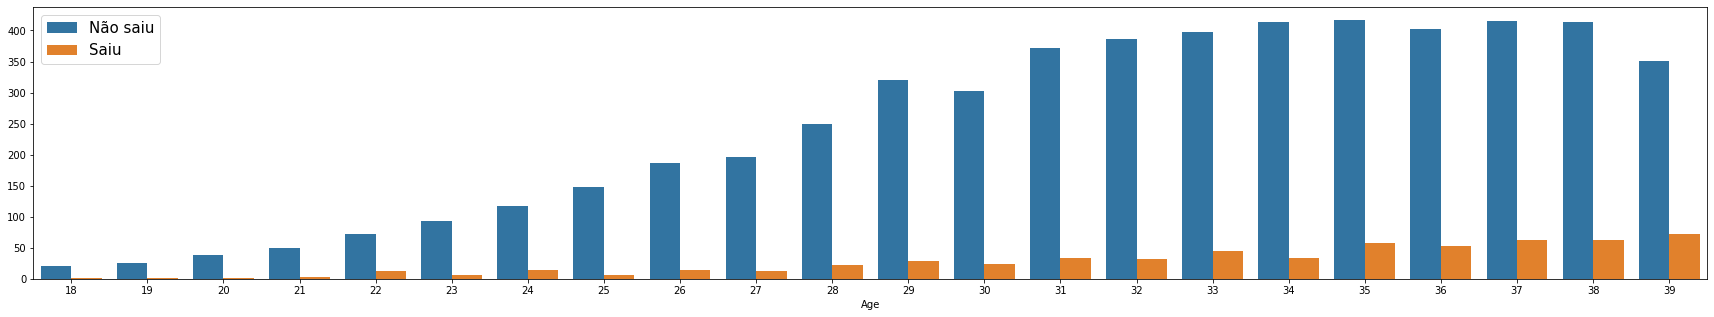

In [150]:
saida1839 = df.query('18 <= Age <= 39')
saida1839.value_counts()
graf1839 = sns.countplot(x='Age', hue='Exited', data = saida1839)
graf1839.figure.set_size_inches(30,5)
plt.legend(['Não saiu', 'Saiu'],fontsize=15)
graf1839.set_ylabel("")
plt.show()

Idade maior que 60

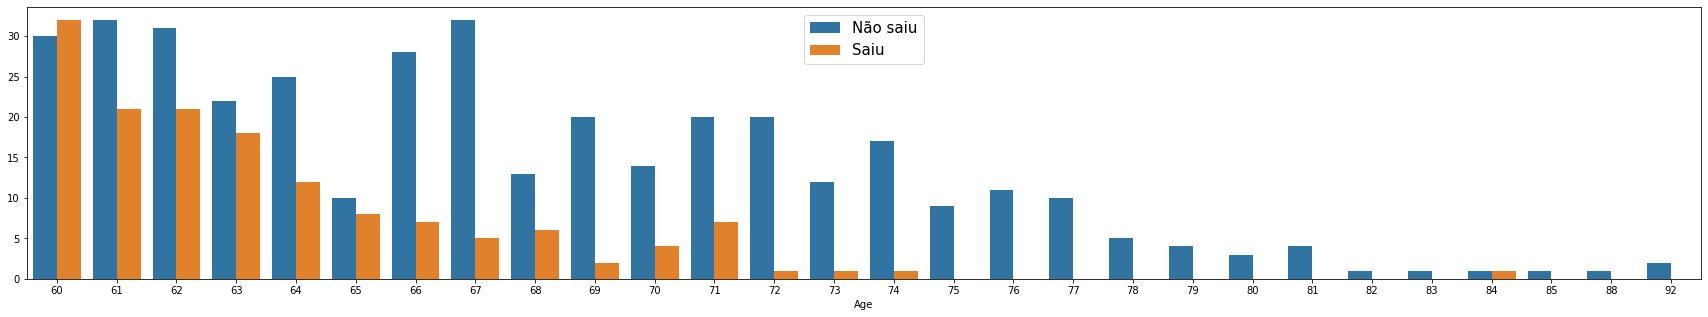

In [152]:
saida6092 = df.query('Age >= 60')
saida6092.value_counts()
graf6092 = sns.countplot(x='Age', hue='Exited', data = saida6092)
graf6092.figure.set_size_inches(30,5)
plt.legend(['Não saiu', 'Saiu'],fontsize=15)
graf6092.set_ylabel("")
plt.show()

##2.2 CREDIT SCORE

Definição faixa de score

In [ ]:
def faixa_score (score):
  if score <= 475:
    return '350 - 475'
  if score <= 600:
    return '475 - 600'
  if score <= 725:
    return '600 - 725'
  if score <= 850:
    return '725 - 850'

df['score_quali'] = [faixa_score(score) for score in df.CreditScore.to_list()]
df['score_quali'].value_counts()

In [24]:
saida_pessoal = df.query("Exited == 1")

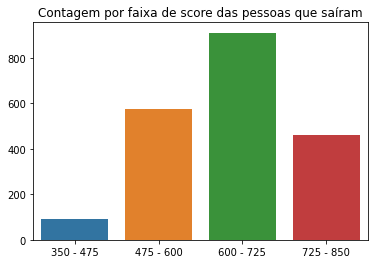

In [129]:
cnt_scr = sns.countplot(data=saida_pessoal, x= 'score_quali', order = ['350 - 475','475 - 600','600 - 725','725 - 850']) 
cnt_scr.set_xlabel('')
cnt_scr.set_ylabel('')
cnt_scr.set(title = "Contagem por faixa de score das pessoas que saíram")
plt.show()

Proporção faixa de score

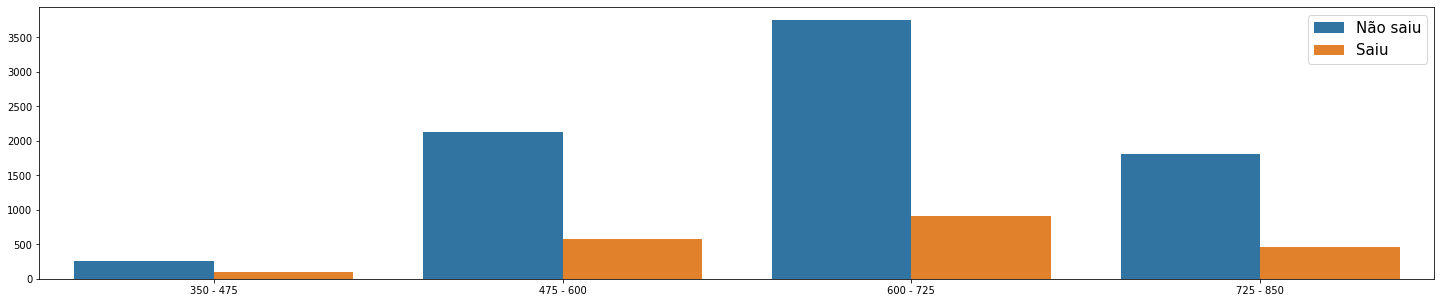

In [153]:
grafscore = sns.countplot(x = 'score_quali', hue = 'Exited', data = df, order = ['350 - 475','475 - 600','600 - 725','725 - 850'])
grafscore.figure.set_size_inches(25,5)
grafscore.set_ylabel('')
grafscore.set_xlabel('')
plt.legend(['Não saiu', 'Saiu'],fontsize=15)
plt.show()

##2.3 SALÁRIO

In [32]:
saida_pessoal = df.query('Exited == 1')

Criando uma faixa para salario

In [33]:
def faixa_salario(salario):
  if salario <= 50000:
    return '0 - 50'
  if 100000 >= salario > 50000:
    return '50 - 100'
  if 150000 >= salario > 100000:
    return '100 - 150'
  if 200000 >= salario > 150000:
    return '150 - 200'

#to_list é uma função que transforma coluna em lista para eu poder iterar
df['faixa_salario'] = [faixa_salario(salario) for salario in df.EstimatedSalary.to_list()]


In [34]:
saida_pessoal = df.query('Exited == 1')

In [ ]:
saida_pessoal['faixa_salario'].value_counts()

Distribuição dos salários totais


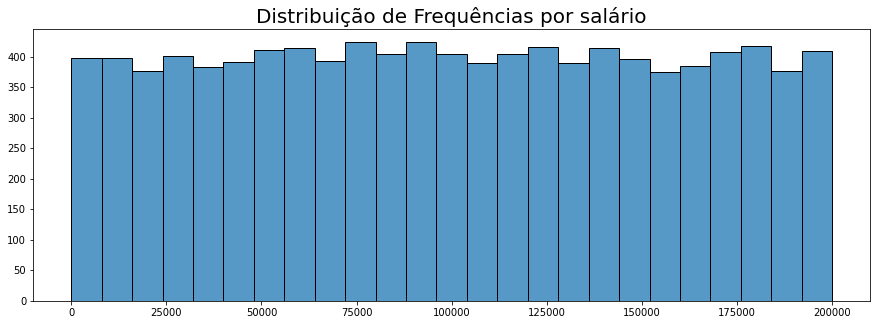

In [130]:
hist_sal = sns.histplot(df['EstimatedSalary'], kde= False, bins = 25 )
hist_sal.figure.set_size_inches(15, 5)
hist_sal.set_title('Distribuição de Frequências por salário', fontsize=20)
hist_sal.set_xlabel('')
hist_sal.set_ylabel("")
plt.show()

Distribuição das faixas de salário

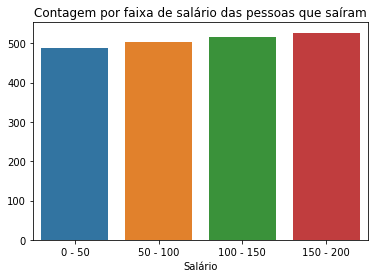

In [ ]:
cnt_sal = sns.countplot(data=saida_pessoal, x= 'faixa_salario', order = ['0 - 50','50 - 100','100 - 150','150 - 200'])
cnt_sal.set_xlabel('Salário')
cnt_sal.set_ylabel('')
cnt_sal.set(title = "Contagem por faixa de salário das pessoas que saíram")
plt.show()

##BALANCE

TOTAL DE CLIENTES COM BALANCE = 0

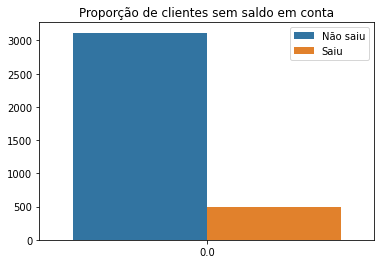

In [143]:
balance0 = df.query('Balance == 0')
grafbalance0 = sns.countplot('Balance', hue = 'Exited', data = balance0)
grafbalance0.set_xlabel('')
grafbalance0.set_ylabel('')
grafbalance0.set(title="Proporção de clientes sem saldo em conta")
plt.legend(['Não saiu', 'Saiu'],fontsize=10)

plt.show()




ATIVOS QUE SAÍRAM COM BALANCE = 0 E POSSUEM CARTÃO DE CRÉDITO

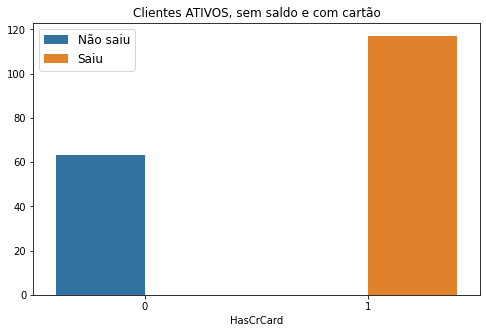

In [155]:
ativos = df.query('Balance == 0 & Exited == 1 & IsActiveMember == 1')
graf_als = sns.countplot(x='HasCrCard', data = ativos, hue = 'HasCrCard')
graf_als.figure.set_size_inches(8,5)
graf_als.set(title="Clientes ATIVOS, sem saldo e com cartão")
plt.legend(['Não saiu', 'Saiu'],fontsize=12)
graf_als.set_ylabel("")

plt.show()

INATIVOS QUE SAÍRAM COM BALANCE = 0 E POSSUEM CARTÃO DE CRÉDITO

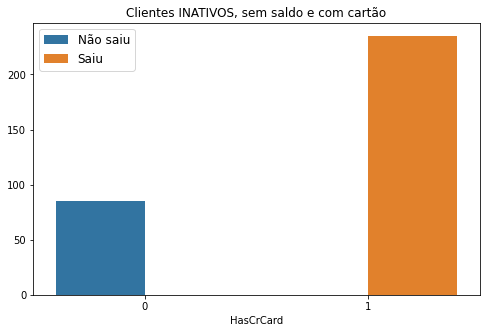

In [110]:
inativos = df.query('Balance == 0 & Exited == 1 & IsActiveMember == 0')
graf_ina = sns.countplot(x='HasCrCard', data = inativos, hue = 'HasCrCard')
graf_ina.figure.set_size_inches(8,5)
graf_ina.set(title="Clientes INATIVOS, sem saldo e com cartão")
plt.legend(['Não saiu', 'Saiu'],fontsize=12)
graf_ina.set_ylabel("")

plt.show()

##PAÍS

PESSOAS QUE SAÍRAM POR PAÍS

In [ ]:
values = saida_pessoal.Geography.value_counts()
labels = ['Germany','France','Spain']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90)

plt.setp(texts, color = 'black')
plt.setp(autotexts, size = 8, color = 'black')
autotexts[1].set_color('black')
plt.show()

GRÁFICO DE BARRAS PARA ENTENDER A PROPORÇÃO DE QUEM DEU CHURN POR PAÍS

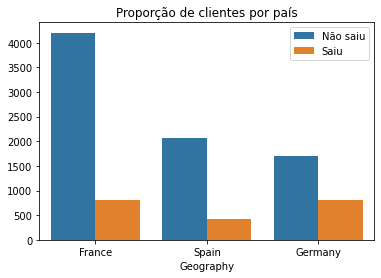

In [133]:
df
sairambarras = sns.countplot(x='Geography', data = df, hue = 'Exited')
sairambarras.set_ylabel('')
plt.legend(['Não saiu', 'Saiu'],fontsize=10)
sairambarras.set(title='Proporção de clientes por país')
plt.show()

BOXPLOT DE IDADE POR PAÍS

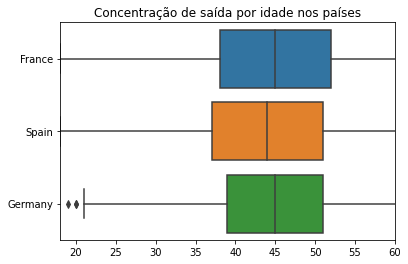

In [122]:
saidas_pais = sns.boxplot(x = saida_pessoal["Age"], y = saida_pessoal["Geography"])
saidas_pais.set(title="Concentração de saída por idade nos países")
plt.xlabel("")
plt.ylabel("")
plt.xlim(18,60)

plt.show()

OBSERVAR OS SALÁRIOS, PARA ISSO FOI DEFINIDO OS SALÁRIOS PELA IDADE. AQUI PUDE ENCONTRAR MAIS VARIAÇÕES

In [134]:
#observar outras variaveis pela idade.
idade_franca = df.query('Geography == "France" & 37 < Age < 53 & Exited == 1')
idade_espanha = df.query('Geography == "Spain" & 35 < Age < 52 & Exited == 1')
idade_alemanha = df.query('Geography == "Germany" & 38 < Age < 52 & Exited == 1')

SAÍDA POR SALÁRIO NA ESPANHA

[Text(0.5, 1.0, 'Saída por salário na Espanha (35-52 anos)')]

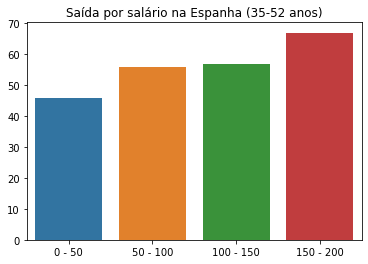

In [135]:
graf_es = sns.countplot(data=idade_espanha, x="faixa_salario", order = ['0 - 50', '50 - 100','100 - 150','150 - 200'])
graf_es.set_xlabel('')
graf_es.set_ylabel('')
graf_es.set(title = "Saída por salário na Espanha (35-52 anos)")

SAÍDA POR SALÁRIO NA ALEMANHA

[Text(0.5, 1.0, 'Saída por salário na Alemanha (39-52 anos)')]

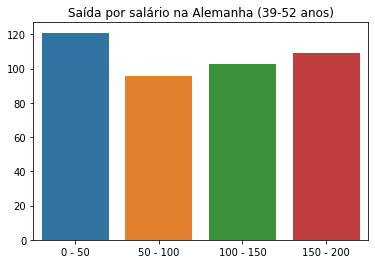

In [136]:
graf_al = sns.countplot(data=idade_alemanha, x="faixa_salario", order = ['0 - 50', '50 - 100','100 - 150','150 - 200'])
graf_al.set_xlabel('')
graf_al.set_ylabel('')
graf_al.set(title = "Saída por salário na Alemanha (39-52 anos)")

SAÍDA POR SALÁRIO NA FRANÇA

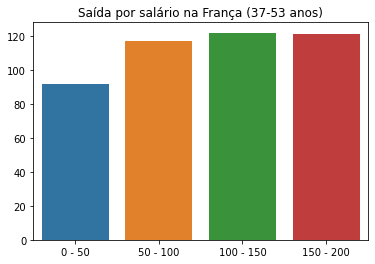

In [137]:
graf_fr = sns.countplot(data=idade_franca, x="faixa_salario", order = ['0 - 50', '50 - 100','100 - 150','150 - 200'])
graf_fr.set_xlabel('')
graf_fr.set_ylabel('')
graf_fr.set(title = "Saída por salário na França (37-53 anos)")
plt.show()

SAÍDA POR ATIVIDADE POR PAÍS

Text(0, 0.5, '')

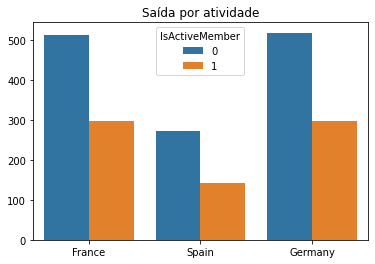

In [139]:
saiu_pais = df.query('Exited == 1')

grafico = sns.countplot(x = 'Geography', hue = 'IsActiveMember', data = saiu_pais)
grafico.set(title = "Saída por atividade")
grafico.set_xlabel("")
grafico.set_ylabel("")

SAÍDA POR ATIVIDADE E SEM SALDO EM CONTA(NINGUÉM NA ALEMANHA)

Text(0, 0.5, '')

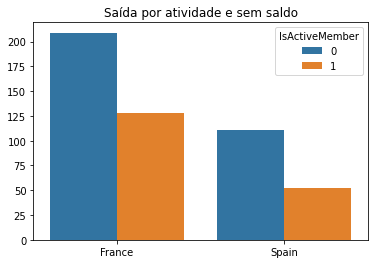

In [141]:
saiu_0 = df.query('Exited == 1 & Balance == 0')

grafico = sns.countplot(x = 'Geography', hue = 'IsActiveMember', data = saiu_0)
grafico.set(title = "Saída por atividade e sem saldo")
grafico.set_xlabel("")
grafico.set_ylabel("")

SAÍDA PELA FAIXA DE SCORE EM CADA PAÍS

In [142]:
saida_es = df.query('Exited == 1 & Geography == "Spain"')
saida_al = df.query('Geography == "Germany" & Exited == 1')
saida_fr = df.query('Geography == "France" & Exited == 1')

SAÍDAS NA ESPANHA

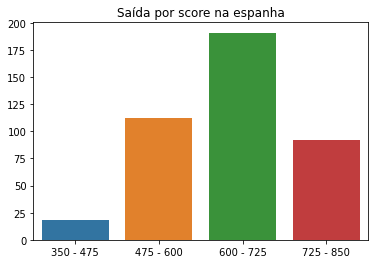

In [ ]:
graf_esp = sns.countplot(data=saida_es, x="score_quali" , order = ['350 - 475','475 - 600','600 - 725','725 - 850'])
graf_esp.set_xlabel('')
graf_esp.set_ylabel('')
graf_esp.set(title = "Saída por score na espanha")

plt.show()

SAÍDAS NA FRANÇA

[Text(0.5, 1.0, 'Saída por score na França')]

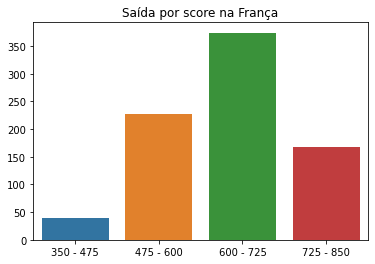

In [ ]:
graf_fra = sns.countplot(data=saida_fr, x="score_quali",order = ['350 - 475','475 - 600','600 - 725','725 - 850'])
graf_fra.set_xlabel('')
graf_fra.set_ylabel('')
graf_fra.set(title = "Saída por score na França")

SAÍDAS NA ALEMANHA

[Text(0.5, 1.0, 'Saída por score na Alemanha')]

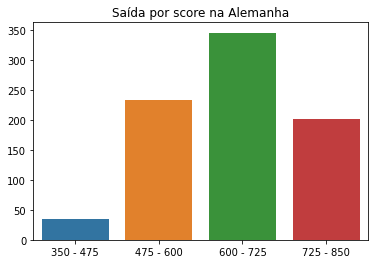

In [ ]:
graf_ale = sns.countplot(data=saida_al, x="score_quali",order = ['350 - 475','475 - 600','600 - 725','725 - 850'])
graf_ale.set_xlabel('')
graf_ale.set_ylabel('')
graf_ale.set(title = "Saída por score na Alemanha")